### Import Functions
This is tfidf version.  
*DO THIS NOTEBOOK ON MECAB ENV!!*

In [ ]:
import get_features
from gensim.models import Word2Vec
gf = get_features.GetFeatures()
model = Word2Vec.load(r"make_corpus/jawiki.model")

### Train model

In [ ]:
# Before doing under cell, DO THIS CELL
from pathlib import Path
import subprocess
Path("data/accuracy.txt").write_text("")

In [3]:
# BE CAREFULL
!del data\*.npy
!del data\*.txt

In [4]:
# DO CAREFULLY
i = 10
for i in range(1,i+1):
    !python split_train_and_test.py
    print("split OK!",i)
    !python get_tf-idf.py
    print("tf-idf OK!",i)
    gf.main(model)
    print("features OK!",i)
    subprocess.call(r"D:\Programs\Python\env35\nlp\Scripts\python.exe train.py " + str(i))
    print("train OK!",i)

split OK! 1
tf-idf OK! 1
features OK! 1
train OK! 1
split OK! 2
tf-idf OK! 2
features OK! 2
train OK! 2
split OK! 3
tf-idf OK! 3
features OK! 3
train OK! 3
split OK! 4
tf-idf OK! 4
features OK! 4
train OK! 4
split OK! 5
tf-idf OK! 5
features OK! 5
train OK! 5
split OK! 6
tf-idf OK! 6
features OK! 6
train OK! 6
split OK! 7
tf-idf OK! 7
features OK! 7
train OK! 7
split OK! 8
tf-idf OK! 8
features OK! 8
train OK! 8
split OK! 9
tf-idf OK! 9
features OK! 9
train OK! 9
split OK! 10
tf-idf OK! 10
features OK! 10
train OK! 10


### Analyze Results (Average Comfusion Matrix)
DO THIS CELL ON NLP ENV!

Average Accuracy: 0.806074673806932


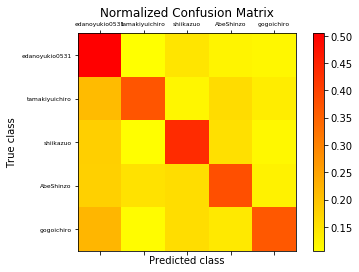

In [7]:
import csv

import numpy as np
import matplotlib.pyplot as plt

import train
t = train.Train()
politicians = t.get_politicians()

i = 10

accuracies = []
with open("data/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("data/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r")
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("data/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)